In [1]:
# Import the necessary packages
# known
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# This just makes it look like R. What's up with these R folks...
plt.style.use('ggplot')

# Where to save the figures

datapath = Path.home() / "Documents/lpthw/projects/DavisSML_lect1/data"
print(datapath)

# loads the file. Don't forget that windows can't figure out when you say .csv
# in your file name, that you don't want .csv.csv...
oecd_bli = pd.read_csv(datapath / "oecd_bli_2015.csv", thousands=',')  # some sort of delimiter?

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]  # column relabling  # wrong
# no, wait. Saying "out of oecd_bli, only take rows in which oecd_bli.inequality is equal to "TOT"

oecd_bli.head()  #print the head

/Users/rcphillips/Documents/lpthw/projects/DavisSML_lect1/data


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [2]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7


In [3]:
gdp_per_capita = pd.read_csv(
				datapath / "gdp_per_capita.csv",
				thousands=',',
				delimiter=',',
				encoding='latin1',
				na_values="n/a"
				)

In [4]:
gdp_per_capita.set_index("Country", inplace=True)

In [5]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [6]:
full_country_stats = pd.merge(
					left=oecd_bli, 
					right=gdp_per_capita, 
					left_index=True,
                    right_index=True

					)

In [7]:
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [8]:
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.57,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8670.00,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.28,2015.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.91,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.37,2013.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.89,2015.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.33,2014.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.91,2014.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13618.57,2015.0


In [9]:
# so, getting the columns GDP per capita and life satisfaction
# for the row "United States" (that's label based indexing!)
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.2
Life satisfaction        6.9
Name: United States, dtype: float64

In [10]:
remove_indices = [0, 1, 6, 8, 33, 34, 36]
keep_indices = list(set(range(38)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[remove_indices]


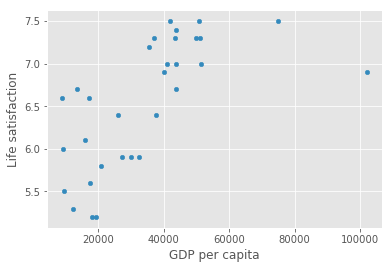

In [11]:
%matplotlib inline
plot1 = sample_data.plot("GDP per capita", "Life satisfaction", kind='scatter')

In [26]:
# Making a design matrix?
x = np.array(sample_data[["GDP per capita"]])
# getting the input feature
n, tmp = x.shape
# assigning the shape of that array to two variables
X = np.hstack((np.ones((n,1)),x))
# getting a horizontal stack of all ones, and then, the other dimension is the length of the whole list? Seems like we coulda used shape.
y = np.array(sample_data[["Life satisfaction"]])

In [27]:
print(X[0:5,:]) #so we're just guessing one for all?

[[1.000000e+00 9.009280e+03]
 [1.000000e+00 9.054910e+03]
 [1.000000e+00 9.437370e+03]
 [1.000000e+00 1.223989e+04]
 [1.000000e+00 1.334091e+04]]


In [28]:
from sklearn import linear_model

In [29]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
lin1.fit(X,y)
print(lin1.coef_)

[[5.72951297e+00 2.37559436e-05]]


In [30]:
yhat = lin1.predict(X)
RSS = np.sum((y-yhat)**2.)

In [31]:
training_error = RSS / n
print(training_error)

0.31015125878674554


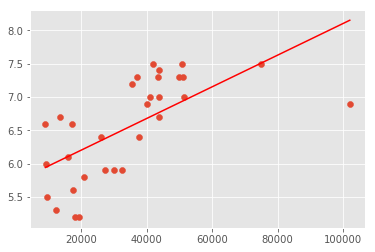

In [32]:
plot2 = plt.scatter(X[:,1],y)
plot2 = plt.plot(X[:,1], yhat, 'r')

In [33]:
X_quad = np.hstack((np.ones((n,1)),x,x**2))

In [34]:
lin2 = linear_model.LinearRegression(fit_intercept=False)
lin2.fit(X_quad, y)
yhat = lin2.predict(X_quad)
RSS = np.sum((y-yhat)**2.)

In [35]:
training_error = RSS / n
print(training_error)

0.233472879079082


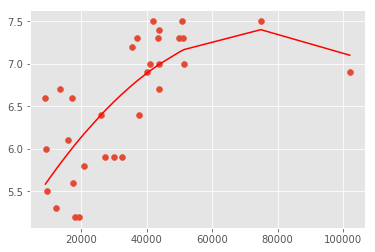

In [36]:
plot3 = plt.scatter(X_quad[:,1],y)
plot3 = plt.plot(X_quad[:,1], yhat, 'r')

In [37]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)
# that's interesting. On mac, sklearn.model selection just worked, but on
# pc, it didn't. I wonder if I installed it earlier, or what?

31

In [45]:
loo_losses = []
# So for each LOO split, we're splitting and fitting!
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin1.fit(X_train,y_train)
    y_hat = lin1.predict(X_test)
    loss = np.sum((y_hat - y_test)**2)
    loo_losses.append(loss)  # nice, we add our loss per loop to a list!
    print("TEST: " + sample_data.index.values[test_index][0] + " " + str(loss))

TEST: Mexico 0.5137155886515413
TEST: Russia 0.003654407230320961
TEST: Turkey 0.2444589147113294
TEST: Hungary 0.602066575159272
TEST: Chile 0.4916204364984781
TEST: Slovak Republic 0.00010013553891018964
TEST: Czech Republic 0.23791466693390287
TEST: Estonia 0.327297574538336
TEST: Greece 1.026167785119128
TEST: Portugal 1.0745261373518968
TEST: Slovenia 0.196200339610624
TEST: Spain 0.0033946356347499943
TEST: Korea 0.24355561961259858
TEST: Italy 0.3112740118447785
TEST: Japan 0.3862082634088586
TEST: Israel 0.42504812435975137
TEST: New Zealand 0.5096585927462152
TEST: France 0.05392555215239791
TEST: Belgium 0.05089589635449425
TEST: Germany 0.09461922446576432
TEST: Finland 0.6448864986837454
TEST: Canada 0.3168994525517347
TEST: Netherlands 0.43632422575596563
TEST: Austria 0.05821806611998992
TEST: United Kingdom 0.005209182748951247
TEST: Sweden 0.16559034427109867
TEST: Iceland 0.3536565215078694
TEST: Australia 0.1448742096537607
TEST: Ireland 0.0028712832761015245
TEST: No

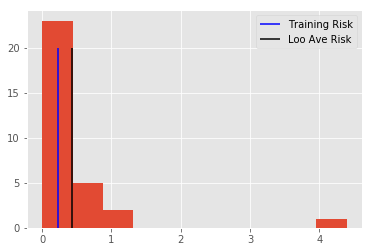

In [47]:
plt.hist(loo_losses)
plt.vlines(training_error, 0, 20, 'b', label= "Training Risk")
plt.vlines(np.mean(loo_losses), 0, 20, 'k', label= "Loo Ave Risk")
legend1 = plt.legend()

In [48]:
def loo_risk(X, y):
    """
    Construct the leave-one-out square error risk for the linear model
    
    Input: design matrix, X, response vector, y
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lin1.fit(X_train, y_train)
        y_hat = lin1.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

In [49]:
help(loo_risk)

Help on function loo_risk in module __main__:

loo_risk(X, y)
    Construct the leave-one-out square error risk for the linear model
    
    Input: design matrix, X, response vector, y
    Output: scalar LOO risk



In [50]:
print("Linear LOO risk: {}".format(loo_risk(X, y)))
print("Quadratic LOO risk: {}".format(loo_risk(X_quad, y)))

Linear LOO risk: 0.42953554727923415
Quadratic LOO risk: 0.3449532855115664
